# Data Analysis of a JSON output from the Unity Experiment Application

Given JSON data, a variety of analytical techniques will be applied in order to interpret the given data

## Get JSON Data

In [1]:
import Rotor
import json
import math
import numpy as np
import matplotlib.pyplot as plt

# user <- 10 or test
#user = "test"
user = "data/1-29-01-2022-13-30"
#user = "data/2-30-01-2022-13-00"
#user = "data/3-30-01-2022-19-00"
#user = "data/4-31-01-2022-16-00"
filename = str(user) + ".json"
data = ""

print("Reading \"" + filename + "\"")

try:
    with open(filename, "r") as f:
        data = json.load(f)
    print("Read json data into [data]")
    print(json.dumps(data, indent=4))
except Exception as e:
    print(e)


Reading "data/1-29-01-2022-13-30.json"
Read json data into [data]
{
    "Control": {
        "Shape_Match": {
            "Shape_Match0": {
                "Loaded Shape": "CapsuleX",
                "Selected Shape": "Capsule",
                "Texture": 0,
                "Time": 18.3559875488281,
                "Initial Rotation": [
                    -0.2473467,
                    0.4739161,
                    -0.5807911,
                    -0.08108849,
                    0.02174161,
                    0.2852235,
                    -0.4758536,
                    0.249134
                ],
                "Final Rotation": [
                    0.3941127,
                    -0.3196243,
                    0.5039229,
                    0.6086731,
                    0.1308278,
                    0.1862895,
                    0.1810751,
                    -0.182993
                ],
                "W Count": 1,
                "Swipe Count": 6
            },
         

In [2]:
# Representation Order
order = [i for i in data.keys()]
print(order)

['Control', 'Timeline', '4D-3D', 'Multi-View']


### Feature Engineering

In [3]:
# Remove low confidence and low submission time (Accidentley clicked submit?)


### Analysis of Shape Matching

In [4]:
# Analysis Functions

# Angle in Degrees
def rad_deg(x):
    return (x/(2*math.pi) ) *360

def rotor_from_list(r):
    rotor = Rotor.Rotor4()
    rotor.constructor(r[0], r[1], r[2], r[3], r[4], r[5], r[6], r[7])
    return rotor

# Test Parameters
test_count = 5

# The number of correct answers per representation
def SHAPE_correct_per_rep(data):
    count = {}
    # iterate through each representation
    # assign its correct answer count to 0
    for rep, v in data.items():
        count[rep] = 0

        # for each test, if the answer was correct 
        # add it to the correct answer count
        for i in range(test_count):

            # Loaded shape may have extended parameters (e.g ConeW)
            # But respondent only has option "Cone"
            if v["Shape_Match"]["Shape_Match{0}".format(i)]["Selected Shape"] in \
               v["Shape_Match"]["Shape_Match{0}".format(i)]["Loaded Shape"]:
                count[rep] += 1
    return count

# The number of correct answers per representation
def SHAPE_incorrect_answered_per_rep(data):
    count = {}
    # iterate through each representation
    # assign its correct answer count to 0
    for rep, v in data.items():
        count[rep] = 0

        # for each test, if the answer was correct 
        # add it to the correct answer count
        for i in range(test_count):

            # Loaded shape may have extended parameters (e.g ConeW)
            # But respondent only has option "Cone"
            if (v["Shape_Match"]["Shape_Match{0}".format(i)]["Selected Shape"] not in \
                v["Shape_Match"]["Shape_Match{0}".format(i)]["Loaded Shape"]) and \
                v["Shape_Match"]["Shape_Match{0}".format(i)]["Selected Shape"] != "None":
                count[rep] += 1
    return count

# The number of unanswered answers per representation
def SHAPE_unanswered_per_rep(data):
    count = {}
    # iterate through each representation
    # assign its correct answer count to 0
    for rep, v in data.items():
        count[rep] = 0

        # for each test, if the answer was correct 
        # add it to the correct answer count
        for i in range(test_count):

            # Loaded shape may have extended parameters (e.g ConeW)
            # But respondent only has option "Cone"
            if v["Shape_Match"]["Shape_Match{0}".format(i)]["Selected Shape"] == "None":
                count[rep] += 1
    return count

def SHAPE_time_data_per_rep(data):
    time = {}
    # iterate through each representation
    # initialise the list of times per representation
    for rep, v in data.items():
        time[rep] = []

        # iterate through each test and append the time taken to submit
        for i in range(test_count):
            time[rep].append(v["Shape_Match"]["Shape_Match{0}".format(i)]["Time"])

    return time

# The average time per representation
def SHAPE_average_time_per_rep(data):
    average_time = {}
    d = SHAPE_time_data_per_rep(data)

    for rep, v in d.items():
        average_time[rep] = np.mean(v)
    return average_time

# The average time per representation
def SHAPE_average_time_correct_per_rep(data):
    average_time = {}
    # iterate through each representation
    # initialise average time per representation
    for rep, v in data.items():
        sum = 0

        # sum up the time for the representation
        for i in range(test_count):
            if v["Shape_Match"]["Shape_Match{0}".format(i)]["Selected Shape"] in \
               v["Shape_Match"]["Shape_Match{0}".format(i)]["Loaded Shape"]:
                
                sum += v["Shape_Match"]["Shape_Match{0}".format(i)]["Time"]
        try:
            average_time[rep] = sum/(SHAPE_correct_per_rep(data)[rep])
        except:
            # No incorrect answers - division by 0
            average_time[rep] = 0
    return average_time

# The average time per representation
def SHAPE_average_time_incorrect_per_rep(data):
    average_time = {}
    # iterate through each representation
    # initialise average time per representation
    for rep, v in data.items():
        sum = 0

        # sum up the time for the representation
        for i in range(test_count):
            if v["Shape_Match"]["Shape_Match{0}".format(i)]["Selected Shape"] not in \
               v["Shape_Match"]["Shape_Match{0}".format(i)]["Loaded Shape"]:
                sum += v["Shape_Match"]["Shape_Match{0}".format(i)]["Time"]

        try:
            average_time[rep] = sum/(5-SHAPE_correct_per_rep(data)[rep])
        except:
            # No incorrect answers - division by 0
            average_time[rep] = 0
    return average_time

# Use of the W axis slider per representation
def SHAPE_use_W_per_rep(data):
    count = {}
    # iterate through each representation
    # assign its w axis use count to 0
    for rep, v in data.items():
        count[rep] = 0

        # for each test, if the W axis slider was used, increment count
        for i in range(test_count):
            count[rep] += v["Shape_Match"]["Shape_Match{0}".format(i)]["W Count"]
    return count

# Use of rotating the object, per representation
def SHAPE_use_of_rotation_per_rep(data):
    count = {}
    # iterate through each representation
    # assign its use of rotation count to 0
    for rep, v in data.items():
        count[rep] = 0
        
        for i in range(test_count):
            count[rep] += v["Shape_Match"]["Shape_Match{0}".format(i)]["Swipe Count"]
    return count

# Produce a list of vectors (2D Array) of statistics for all numerical features
def SHAPE_continuous_vectors(data):
    labels = ["Correct", "Confidence", "Understanding", "Remaining Time", "W Count", "Swipe Count", "Initial Rotation", "Iteration"]

    behaviour = {
        "Yes":1,
        "No":0
    }
    vectors = []
    itr = 0
    # iterate through the tests and get the data corresponding to the above labels
    for rep, v in data.items():
        for i in range(test_count):
            d = []
            d.append( int( v["Shape_Match"]["Shape_Match{0}".format(i)]["Selected Shape"] in \
                           v["Shape_Match"]["Shape_Match{0}".format(i)]["Loaded Shape"]) )
            d.append( int(       v["Shape_Match"]["Shape_Match{0}_Survey".format(i)]["confidance"]) )
            d.append( behaviour[ v["Shape_Match"]["Shape_Match{0}_Survey".format(i)]["behaviour"] ] )
            d.append( 20-v["Shape_Match"]["Shape_Match{0}".format(i)]["Time"] )
            d.append( v["Shape_Match"]["Shape_Match{0}".format(i)]["W Count"] )
            d.append( v["Shape_Match"]["Shape_Match{0}".format(i)]["Swipe Count"] )
            ra = rotor_from_list( v["Shape_Match"]["Shape_Match{0}".format(i)]["Initial Rotation"] )
            rb = rotor_from_list( [1, 0, 0, 0, 0, 0, 0, 0] )
            dif = Rotor.Rotor4.difference(ra, rb)
            d.append( dif )
            d.append( itr )
            vectors.append(d)
        itr += 1
    return (labels, np.array(vectors))

# Helper function to compare shapes
def shape_check(shape, check):
    if shape in check: return 1
    else: return 0

# Produce a list of vectors (2D Array) of statistics for categorical vs numerical data focussing on the Shapes
def SHAPE_shape_vectors(data):
    labels = ["Sphere", "Box", "Cone", "Torus", "Capsule", "Pentachoron", # Shapes
                "Correctness", "Confidence", "Understanding", "Time"]     # Continuous Metrics
    behaviour = {
        "Yes":1,
        "No":0
    }
    vectors = []
    for rep, v in data.items():
        for i in range(test_count):
            d = []
            d.append( shape_check("Sphere",     v["Shape_Match"]["Shape_Match{0}".format(i)]["Loaded Shape"]) )
            d.append( shape_check("Box",        v["Shape_Match"]["Shape_Match{0}".format(i)]["Loaded Shape"]) )
            d.append( shape_check("Cone",       v["Shape_Match"]["Shape_Match{0}".format(i)]["Loaded Shape"]) )
            d.append( shape_check("Torus",      v["Shape_Match"]["Shape_Match{0}".format(i)]["Loaded Shape"]) )
            d.append( shape_check("Capsule",    v["Shape_Match"]["Shape_Match{0}".format(i)]["Loaded Shape"]) )
            d.append( shape_check("Tetrahedron",v["Shape_Match"]["Shape_Match{0}".format(i)]["Loaded Shape"]) )

            d.append( int( v["Shape_Match"]["Shape_Match{0}".format(i)]["Selected Shape"] in \
                           v["Shape_Match"]["Shape_Match{0}".format(i)]["Loaded Shape"]) )
            d.append( int(       v["Shape_Match"]["Shape_Match{0}_Survey".format(i)]["confidance"]) )
            d.append( behaviour[ v["Shape_Match"]["Shape_Match{0}_Survey".format(i)]["behaviour"] ] )
            d.append( 20-v["Shape_Match"]["Shape_Match{0}".format(i)]["Time"] )

            vectors.append(d)
    
    return (labels, np.array(vectors))

# Helper function to compare representation
def rep_check(rep, check):
    if rep == check: return 1
    else: return 0

# Produce a list of vectors (2D Array) of statistics for categorical vs numerical data focussing on the Representations
def SHAPE_representation_vectors(data):
    labels = ["Control", "Timeline", "4D-3D", "Multi-View",         # Representations
              "Correctness", "Confidence", "Understanding", "Time"] # Continuous Metrics
    behaviour = {
        "Yes":1,
        "No":0
    }
    vectors = []
    for rep, v in data.items():
        for i in range(test_count):
            d = []

            d.append( shape_check("Control",    rep) )
            d.append( shape_check("Timeline",   rep) )
            d.append( shape_check("4D-3D",      rep) )
            d.append( shape_check("Multi-View", rep) )

            d.append( int( v["Shape_Match"]["Shape_Match{0}".format(i)]["Selected Shape"] in \
                           v["Shape_Match"]["Shape_Match{0}".format(i)]["Loaded Shape"]) )
            d.append( int(       v["Shape_Match"]["Shape_Match{0}_Survey".format(i)]["confidance"]) )
            d.append( behaviour[ v["Shape_Match"]["Shape_Match{0}_Survey".format(i)]["behaviour"] ] )
            d.append( 20-v["Shape_Match"]["Shape_Match{0}".format(i)]["Time"] )
            vectors.append(d)
    
    return (labels, np.array(vectors))

In [5]:
# Call Functions

# Correctness
print("The number of correct answers per representation:         ", SHAPE_correct_per_rep(data))
print("The number of incorrect answers per representation:       ", SHAPE_incorrect_answered_per_rep(data))
print("The number of unanswered questions:                       ", SHAPE_unanswered_per_rep(data))

# Average times per representation
print("The average time per representation:                      ", SHAPE_average_time_per_rep(data))
print("The average time for correct answers per representation:  ", SHAPE_average_time_correct_per_rep(data))
print("The average time for incorrect answers per representation:", SHAPE_average_time_incorrect_per_rep(data))
# Count of time elapsed incorrect answers

# Which representations provided more information about about the shape of the object in terms of the W axis
#   (order representations by the fact a user did not move the W axis slider at all)
print("Use of the W-axis slider, per representation:             ", SHAPE_use_W_per_rep(data))
# Which representations provided more information about about the shape from all sides?
#   (order representations based on the fact the initial random rotation is equal to the final random rotation)
print("Use of rotating the object, per representation:           ", SHAPE_use_of_rotation_per_rep(data))

# Correlations
# TODO: Shape Match Correlations
# Is there a correlation between incorrect answers and an un-rotated object - capsule and cone

The number of correct answers per representation:          {'Control': 4, 'Timeline': 2, '4D-3D': 4, 'Multi-View': 5}
The number of incorrect answers per representation:        {'Control': 0, 'Timeline': 2, '4D-3D': 1, 'Multi-View': 0}
The number of unanswered questions:                        {'Control': 1, 'Timeline': 1, '4D-3D': 0, 'Multi-View': 0}
The average time per representation:                       {'Control': 17.767395019531257, 'Timeline': 15.127783203125, '4D-3D': 16.0132080078125, 'Multi-View': 11.701171875}
The average time for correct answers per representation:   {'Control': 17.20899200439455, 'Timeline': 12.135498046875, '4D-3D': 15.501007080078125, 'Multi-View': 11.701171875}
The average time for incorrect answers per representation: {'Control': 20.0010070800781, 'Timeline': 17.122639973958332, '4D-3D': 18.06201171875, 'Multi-View': 0}
Use of the W-axis slider, per representation:              {'Control': 4, 'Timeline': 4, '4D-3D': 10, 'Multi-View': 0}
Use of rotati

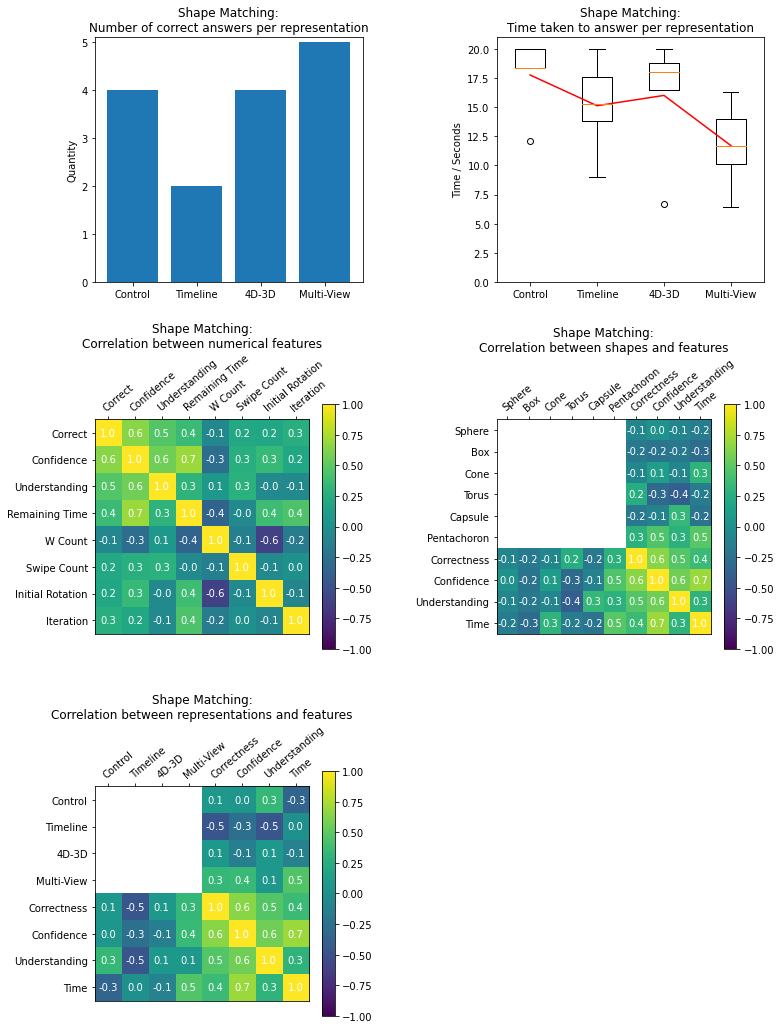

In [6]:
# Graphing

fig = plt.figure(figsize = (12, 18))
ax0 = fig.add_subplot(321)
ax1 = fig.add_subplot(322)
ax2 = fig.add_subplot(323)
ax3 = fig.add_subplot(324)
ax4 = fig.add_subplot(325)
fig.subplots_adjust(hspace=0.5, wspace = 0.5)

ax0.set_title("Shape Matching:\nNumber of correct answers per representation")
d = SHAPE_correct_per_rep(data)
x = d.keys()
y = d.values()
ax0.bar(x, y)
ax0.set_ylim((0, 5.1))
ax0.set_ylabel("Quantity")

ax1.set_title("Shape Matching:\nTime taken to answer per representation")
d = [i for i in SHAPE_time_data_per_rep(data).values()]
ax1.boxplot( d )
x = [1, 2, 3, 4]
ax1.set_xticks(x, order)
ax1.set_ylim((0, 21))
ax1.set_ylabel("Time / Seconds")
y = SHAPE_average_time_per_rep(data).values()
ax1.plot(x, y, 'r')

ax2.set_title("Shape Matching:\nCorrelation between numerical features")

# Build Correlation Matrix
labels, matrix = SHAPE_continuous_vectors(data)
corr = np.corrcoef(matrix.T)
l = len(corr)

# Plot the correlation coefficient heatmat
im = ax2.imshow(corr, vmin = -1, vmax = 1)
ax2.set_xticks(np.arange(l), labels=labels)
ax2.xaxis.tick_top()
ax2.set_yticks(np.arange(l), labels=labels)
plt.colorbar(im, ax=ax2)
plt.setp(ax2.get_xticklabels(), rotation=40, ha="left", rotation_mode="anchor")

# Overlay the correlation coefficient
for i in range(l):
    for j in range(l):
        text = ax2.text(j, i, round(corr[i, j], 1), ha="center", va="center", color="w")


ax3.set_title("Shape Matching:\nCorrelation between shapes and features")
labels, matrix = SHAPE_shape_vectors(data)
corr = np.corrcoef(matrix.T)
l = len(corr)
corr[0:6, 0:6] = np.nan

# Plot the correlation coefficient heatmat
im = ax3.imshow(corr, vmin = -1, vmax = 1)
ax3.set_xticks(np.arange(l), labels=labels)
ax3.xaxis.tick_top()
ax3.set_yticks(np.arange(l), labels=labels)
plt.colorbar(im, ax=ax3)
plt.setp(ax3.get_xticklabels(), rotation=40, ha="left", rotation_mode="anchor")

# Overlay the correlation coefficient
for i in range(l):
    for j in range(l):
        text = ax3.text(j, i, round(corr[i, j], 1), ha="center", va="center", color="w")


ax4.set_title("Shape Matching:\nCorrelation between representations and features")
labels, matrix = SHAPE_representation_vectors(data)
corr = np.corrcoef(matrix.T)
l = len(corr)
corr[0:4, 0:4] = np.nan

# Plot the correlation coefficient heatmat
im = ax4.imshow(corr, vmin = -1, vmax = 1)
ax4.set_xticks(np.arange(l), labels=labels)
ax4.xaxis.tick_top()
ax4.set_yticks(np.arange(l), labels=labels)
plt.colorbar(im, ax=ax4)
plt.setp(ax4.get_xticklabels(), rotation=40, ha="left", rotation_mode="anchor")

# Overlay the correlation coefficient
for i in range(l):
    for j in range(l):
        text = ax4.text(j, i, round(corr[i, j], 1), ha="center", va="center", color="w")


### Analysis of Rotation Matching

In [7]:
# Analysis Functions

# Test Parameters
test_count = 5

# Jaccard Index
def jaccard_index(a, b):
    intersection = np.logical_and(a, b)
    union = np.logical_or(a, b)
    return np.sum(intersection) / np.sum(union)

# Jaccard index of rotation boolean arrays to measure the accuracy per representation
def ROTATE_jaccard_per_rep(data):
    index = {}
    # iterate through each representation
    # assign its jaccard indices to an empty list
    for rep, v in data.items():
        index[rep] = []

        # for each test, find the Jaccard index and add it to count
        for i in range(test_count):
            
            # Get loaded and selected rotations
            a = np.array(v["Rotation_Match"]["Rotation_Match{0}".format(i)]["Loaded Rotation"])
            b = np.array(v["Rotation_Match"]["Rotation_Match{0}".format(i)]["Selected Rotation"])

            # Jaccard Index
            index[rep].append(jaccard_index(a, b))

    return index

# The average jaccard index for each representation
def ROTATE_average_jaccard_per_rep(data):
    d={}
    for rep, v in ROTATE_jaccard_per_rep(data).items():
        d[rep] = np.sum(v)/test_count
    return d

# The number of totally correct answers
def ROTATE_totally_correct_per_rep(data):
    count = {}
    # iterate through each representation
    # assign its correct answer count to 0
    for rep, v in data.items():
        count[rep] = 0

        # for each test, find the Jaccard index and add it to count
        for i in range(test_count):

            # Get loaded and selected rotations
            a = np.array(v["Rotation_Match"]["Rotation_Match{0}".format(i)]["Loaded Rotation"])
            b = np.array(v["Rotation_Match"]["Rotation_Match{0}".format(i)]["Selected Rotation"])

            if np.array_equiv(a, b):
                count[rep] += 1
                
    return count

# The number of planes of rotation per test
def ROTATE_number_of_rotations_per_test(data):
    count = {}
    # iterate through each representation
    # assign its correct answer count to 0
    for rep, v in data.items():
        count[rep] = []

        # for each test, find the Jaccard index and add it to count
        for i in range(test_count):
            # Get loaded and selected rotations
            count[rep].append( np.count_nonzero(np.array(v["Rotation_Match"]["Rotation_Match{0}".format(i)]["Loaded Rotation"])) )
    
    return count

# The time data per representation
def ROTATE_time_data_per_rep(data):
    times = {}
    
    # iterate through each representation
    # initialise list to append time data to
    for rep, v in data.items():
        times[rep] = []
        for i in range(test_count):
            times[rep].append( v["Rotation_Match"]["Rotation_Match{0}".format(i)]["Time"] )
    return times

# The average time per representation
def ROTATE_average_time_per_rep(data):
    average_time = {}
    
    d = ROTATE_time_data_per_rep(data)
    for rep, v in d.items():
        average_time[rep] = np.mean(v)
    return average_time

# Produce a list of vectors (2D Array) of statistics for all numerical features
def ROTATE_continuous_vectors(data):
    labels = ["Correctness", "Confidence", "Understanding", "Remaining Time", "Number of Rotations", "Iteration"]

    behaviour = {
        "Yes":1,
        "No":0,
        "Sort of":0.5
    }
    vectors = []
    itr = 0
    # iterate through the tests and get the data corresponding to the above labels
    for rep, v in data.items():
        for i in range(test_count):
            d = []
            d.append( jaccard_index(v["Rotation_Match"]["Rotation_Match{0}".format(i)]["Loaded Rotation"], 
                                    v["Rotation_Match"]["Rotation_Match{0}".format(i)]["Selected Rotation"]) )
            d.append( int(       v["Rotation_Match"]["Rotation_Match{0}_Survey".format(i)]["confidance"]) )
            d.append( behaviour[ v["Rotation_Match"]["Rotation_Match{0}_Survey".format(i)]["behaviour"] ] )
            d.append( 20-v["Rotation_Match"]["Rotation_Match{0}".format(i)]["Time"] )
            d.append( np.count_nonzero(np.array(v["Rotation_Match"]["Rotation_Match{0}".format(i)]["Loaded Rotation"])) )
            d.append( itr )
            vectors.append(d)
        itr += 1
    return (labels, np.array(vectors))

# Helper function to compare shapes
def shape_check(shape, check):
    if shape in check: return 1
    else: return 0

# Produce a list of vectors (2D Array) of statistics for categorical vs numerical data focussing on the Shapes
def ROTATE_shape_vectors(data):
    labels = ["Box", "Cone", "Torus", "Capsule", "Pentachoron", # Shapes
                "Correctness", "Confidence", "Understanding", "Time"]     # Continuous Metrics
    behaviour = {
        "Yes":1,
        "No":0,
        "Sort of":0.5
    }
    vectors = []
    for rep, v in data.items():
        for i in range(test_count):
            d = []
            d.append( shape_check("Box",        v["Rotation_Match"]["Rotation_Match{0}".format(i)]["Shape"]) )
            d.append( shape_check("Cone",       v["Rotation_Match"]["Rotation_Match{0}".format(i)]["Shape"]) )
            d.append( shape_check("Torus",      v["Rotation_Match"]["Rotation_Match{0}".format(i)]["Shape"]) )
            d.append( shape_check("Capsule",    v["Rotation_Match"]["Rotation_Match{0}".format(i)]["Shape"]) )
            d.append( shape_check("Tetrahedron",v["Rotation_Match"]["Rotation_Match{0}".format(i)]["Shape"]) )

            d.append( jaccard_index(v["Rotation_Match"]["Rotation_Match{0}".format(i)]["Loaded Rotation"], 
                                    v["Rotation_Match"]["Rotation_Match{0}".format(i)]["Selected Rotation"]) )
            d.append( int(       v["Rotation_Match"]["Rotation_Match{0}_Survey".format(i)]["confidance"]) )
            d.append( behaviour[ v["Rotation_Match"]["Rotation_Match{0}_Survey".format(i)]["behaviour"] ] )
            d.append( 20-v["Rotation_Match"]["Rotation_Match{0}".format(i)]["Time"] )

            vectors.append(d)
    
    return (labels, np.array(vectors))

# Helper function to compare representation
def rep_check(rep, check):
    if rep == check: return 1
    else: return 0

# Produce a list of vectors (2D Array) of statistics for categorical vs numerical data focussing on the Representations
def ROTATE_representation_vectors(data):
    labels = ["Control", "Timeline", "4D-3D", "Multi-View",         # Representations
              "Correctness", "Confidence", "Understanding", "Time"] # Continuous Metrics
    behaviour = {
        "Yes":1,
        "No":0,
        "Sort of":0.5
    }
    vectors = []
    for rep, v in data.items():
        for i in range(test_count):
            d = []

            d.append( shape_check("Control",    rep) )
            d.append( shape_check("Timeline",   rep) )
            d.append( shape_check("4D-3D",      rep) )
            d.append( shape_check("Multi-View", rep) )

            d.append( jaccard_index(v["Rotation_Match"]["Rotation_Match{0}".format(i)]["Loaded Rotation"], 
                                    v["Rotation_Match"]["Rotation_Match{0}".format(i)]["Selected Rotation"]) )
            d.append( int(       v["Rotation_Match"]["Rotation_Match{0}_Survey".format(i)]["confidance"]) )
            d.append( behaviour[ v["Rotation_Match"]["Rotation_Match{0}_Survey".format(i)]["behaviour"] ] )
            d.append( 20-v["Rotation_Match"]["Rotation_Match{0}".format(i)]["Time"] )
            vectors.append(d)
    
    return (labels, np.array(vectors))

In [8]:
# Call Functions

# The correctness of loaded and selected rotations per representation
print("The Jaccard index of rotation boolean arrays per representation:", ROTATE_jaccard_per_rep(data))
print("The Average Jaccard index per representation:                   ", ROTATE_average_jaccard_per_rep(data))
print("The number of correct answers per representation:               ", ROTATE_totally_correct_per_rep(data))

# use number of planes of rotation to weight effectiveness of representations
print("The number of planes of rotation per test:                      ", ROTATE_number_of_rotations_per_test(data))

# Average times per representation
print("The average time per representation:                            ", ROTATE_average_time_per_rep(data))

# Correlations
# TODO: Rotation Match Correlations
# Is there a correlation between correctness and "Loaded Texture"
# Is there a correlation between incorrect answers and 3D rotation
#   (Does it confuse things even more when combined with 4D rotation)

# Correlation Matrix
# Loaded Texture
# Bool 3D Rotation

The Jaccard index of rotation boolean arrays per representation: {'Control': [0.5, 0.3333333333333333, 0.3333333333333333, 0.0, 1.0], 'Timeline': [0.3333333333333333, 1.0, 1.0, 1.0, 1.0], '4D-3D': [1.0, 1.0, 0.0, 0.3333333333333333, 0.25], 'Multi-View': [0.5, 0.5, 0.4, 0.5, 0.25]}
The Average Jaccard index per representation:                    {'Control': 0.4333333333333333, 'Timeline': 0.8666666666666666, '4D-3D': 0.5166666666666667, 'Multi-View': 0.43}
The number of correct answers per representation:                {'Control': 1, 'Timeline': 4, '4D-3D': 2, 'Multi-View': 0}
The number of planes of rotation per test:                       {'Control': [1, 1, 2, 2, 1], 'Timeline': [2, 2, 1, 1, 2], '4D-3D': [2, 3, 2, 1, 1], 'Multi-View': [2, 1, 3, 1, 2]}
The average time per representation:                             {'Control': 45.2035888671875, 'Timeline': 29.5664306640625, '4D-3D': 25.7573974609375, 'Multi-View': 32.05302734375}


/home/joesubbi/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/joesubbi/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


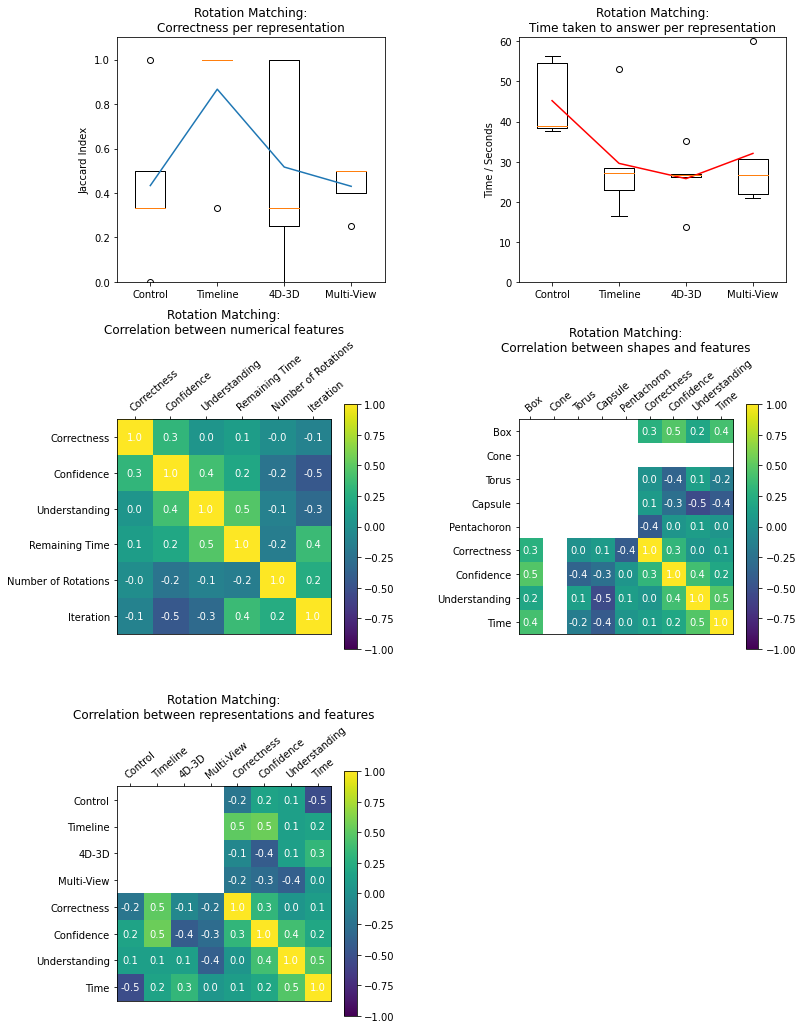

In [9]:
# Graphing

fig = plt.figure(figsize = (12, 18))
ax0 = fig.add_subplot(321)
ax1 = fig.add_subplot(322)
ax2 = fig.add_subplot(323)
ax3 = fig.add_subplot(324)
ax4 = fig.add_subplot(325)
fig.subplots_adjust(hspace=0.5, wspace = 0.5)

ax0.set_title("Rotation Matching:\nCorrectness per representation")
d = [i for i in ROTATE_jaccard_per_rep(data).values()]
ax0.boxplot( d )
x = [1, 2, 3, 4]
ax0.set_xticks(x, order)
ax0.set_ylim((0, 1.1))
ax0.set_ylabel("Jaccard Index")
y = ROTATE_average_jaccard_per_rep(data).values()
ax0.plot(x, y)

ax1.set_title("Rotation Matching:\nTime taken to answer per representation")
d = [i for i in ROTATE_time_data_per_rep(data).values()]
ax1.boxplot( d )
x = [1, 2, 3, 4]
ax1.set_xticks(x, order)
ax1.set_ylim((0, 61))
ax1.set_ylabel("Time / Seconds")
y = ROTATE_average_time_per_rep(data).values()
ax1.plot(x, y, 'r')


ax2.set_title("Rotation Matching:\nCorrelation between numerical features")

# Build Correlation Matrix
labels, matrix = ROTATE_continuous_vectors(data)
corr = np.corrcoef(matrix.T)
l = len(corr)

# Plot the correlation coefficient heatmat
im = ax2.imshow(corr, vmin = -1, vmax = 1)
ax2.set_xticks(np.arange(l), labels=labels)
ax2.xaxis.tick_top()
ax2.set_yticks(np.arange(l), labels=labels)
plt.colorbar(im, ax=ax2)
plt.setp(ax2.get_xticklabels(), rotation=40, ha="left", rotation_mode="anchor")

# Overlay the correlation coefficient
for i in range(l):
    for j in range(l):
        text = ax2.text(j, i, round(corr[i, j], 1), ha="center", va="center", color="w")


ax3.set_title("Rotation Matching:\nCorrelation between shapes and features")
labels, matrix = ROTATE_shape_vectors(data)
corr = np.corrcoef(matrix.T)
l = len(corr)
corr[0:5, 0:5] = np.nan

# Plot the correlation coefficient heatmat
im = ax3.imshow(corr, vmin = -1, vmax = 1)
ax3.set_xticks(np.arange(l), labels=labels)
ax3.xaxis.tick_top()
ax3.set_yticks(np.arange(l), labels=labels)
plt.colorbar(im, ax=ax3)
plt.setp(ax3.get_xticklabels(), rotation=40, ha="left", rotation_mode="anchor")

# Overlay the correlation coefficient
for i in range(l):
    for j in range(l):
        text = ax3.text(j, i, round(corr[i, j], 1), ha="center", va="center", color="w")


ax4.set_title("Rotation Matching:\nCorrelation between representations and features")
labels, matrix = ROTATE_representation_vectors(data)
corr = np.corrcoef(matrix.T)
l = len(corr)
corr[0:4, 0:4] = np.nan

# Plot the correlation coefficient heatmat
im = ax4.imshow(corr, vmin = -1, vmax = 1)
ax4.set_xticks(np.arange(l), labels=labels)
ax4.xaxis.tick_top()
ax4.set_yticks(np.arange(l), labels=labels)
plt.colorbar(im, ax=ax4)
plt.setp(ax4.get_xticklabels(), rotation=40, ha="left", rotation_mode="anchor")

# Overlay the correlation coefficient
for i in range(l):
    for j in range(l):
        text = ax4.text(j, i, round(corr[i, j], 1), ha="center", va="center", color="w")

### Analysis of Pose Matching

In [10]:
# Analysis Functions

# Test Parameters
test_count = 3

# Angle in Degrees
def rad_deg(x):
    return (x/(2*math.pi) ) *360

def rotor_from_list(r):
    rotor = Rotor.Rotor4()
    rotor.constructor(r[0], r[1], r[2], r[3], r[4], r[5], r[6], r[7])
    return rotor

# Accuracy data for each representation stored in a list of angles in degrees
def POSE_accuracy_data_per_rep(data):
    d = {}
    # iterate through each representations
    # initialise empty list for minimum angle for each test
    for rep, v in data.items():

        d[rep] = []

        # iterate through tests to find angle difference between rotors
        for i in range(test_count):

            a = v["Pose_Match"]["Pose_Match{0}".format(i)]["Main Rotor"]
            ra = rotor_from_list(a)

            b = v["Pose_Match"]["Pose_Match{0}".format(i)]["Match Rotor"]
            rb = rotor_from_list(b)

            try:
                angle = rad_deg( Rotor.Rotor4.difference(ra, rb) )
            except:
                angle = 0
            d[rep].append(angle)
    return d

def POSE_average_accuracy_per_rep(data):
    best = {}

    for rep, v in POSE_accuracy_data_per_rep(data).items():
        best[rep] = np.mean(v)
    return best

def POSE_best_accuracy_per_rep(data):
    best = {}

    for rep, v in POSE_accuracy_data_per_rep(data).items():
        best[rep] = np.max(v)
    return best

def POSE_worst_accuracy_per_rep(data):
    best = {}

    for rep, v in POSE_accuracy_data_per_rep(data).items():
        best[rep] = np.min(v)
    return best

# The time data per representation
def POSE_time_data_per_rep(data):
    times = {}
    
    # iterate through each representation
    # initialise list to append time data to
    for rep, v in data.items():
        times[rep] = []
        for i in range(test_count):
            times[rep].append( v["Pose_Match"]["Pose_Match{0}".format(i)]["Time"] )
    return times

# The average time per representation
def POSE_average_time_per_rep(data):
    average_time = {}
    
    d = POSE_time_data_per_rep(data)
    for rep, v in d.items():
        average_time[rep] = np.mean(v)
    return average_time


In [11]:
# Call Functions

print("The average accuracy per representation:    ", POSE_average_accuracy_per_rep(data))
print("The best Accuracy per representation:       ", POSE_best_accuracy_per_rep(data))
print("The worst Accuracy per representation:      ", POSE_worst_accuracy_per_rep(data))

print("The average time per representation:        ", POSE_average_time_per_rep(data))

# Correlation
# Is there a correlation between Time taken and "How easy did you find it"
# Is there a correlation between Time taken and "Accuracy"
#   (Assuming No, unless ran out of time?)
# Is there a correlation between "Accuracy" and "How easy did you find it"
# Is there a correlation between "Loaded Shape" and "Accuracy"
# Is there a correlation between "Loaded Texture" and "Accuracy"
# Is there a correlation between "Slider Count" and "Initial Match Rotor" position

# Correlation Matrix
# Time
# Accuracy
# Easyness
# Shape
# Texture
# W Count
# Swipe Count
# Initial Rotation
# Representation

The average accuracy per representation:     {'Control': 104.32938496149607, 'Timeline': 83.62698404824967, '4D-3D': 110.96500320346881, 'Multi-View': 95.91335460574867}
The best Accuracy per representation:        {'Control': 118.57561467872212, 'Timeline': 165.64763305029257, '4D-3D': 146.7603903858652, 'Multi-View': 112.53570560795819}
The worst Accuracy per representation:       {'Control': 91.1918086505667, 'Timeline': 13.508947519529562, '4D-3D': 45.69727007178964, 'Multi-View': 85.14500123953883}
The average time per representation:         {'Control': 139.85402425130226, 'Timeline': 126.92338053385451, '4D-3D': 70.13834635416667, 'Multi-View': 87.0654296875}


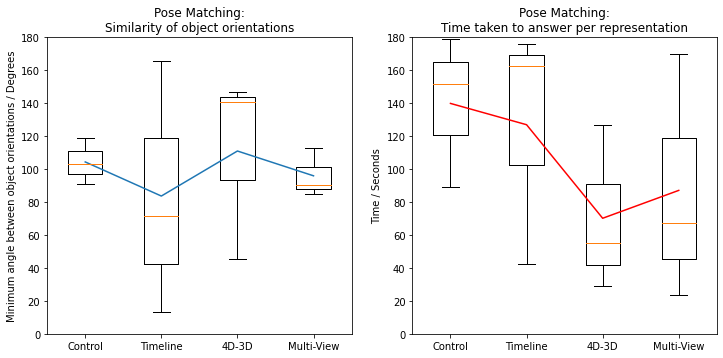

In [12]:
# Graphing

fig = plt.figure(figsize = (12,12))
ax0 = fig.add_subplot(221)
ax1 = fig.add_subplot(222)

ax0.set_title("Pose Matching:\nSimilarity of object orientations")
d = [i for i in POSE_accuracy_data_per_rep(data).values()]
ax0.boxplot( d )
x = [1, 2, 3, 4]
ax0.set_xticks(x, order)
ax0.set_ylim((0, 180))
ax0.set_ylabel("Minimum angle between object orientations / Degrees")
y = POSE_average_accuracy_per_rep(data).values()
ax0.plot(x, y)

# Name ones which used a tetrahedron
# Name ones which were labeled as "hard"

ax1.set_title("Pose Matching:\nTime taken to answer per representation")
d = [i for i in POSE_time_data_per_rep(data).values()]
ax1.boxplot( d )
x = [1, 2, 3, 4]
ax1.set_xticks(x, order)
ax1.set_ylim((0, 180))
ax1.set_ylabel("Time / Seconds")
y = POSE_average_time_per_rep(data).values()
ax1.plot(x, y, 'r')